# Distribution by time - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_1H.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_1H.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
# data = data[data.index > '2020-11-01 00:00:00']

In [5]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,946.4,942.3,946.0,18959
2018-08-13 10:00:00,945.9,946.3,942.3,943.7,16381
2018-08-13 11:00:00,943.7,947.3,943.3,947.3,8416
2018-08-13 13:00:00,947.5,950.2,946.7,949.9,21499
2018-08-13 14:00:00,949.7,954.6,948.9,954.2,14072
...,...,...,...,...,...
2025-10-06 11:00:00,1887.9,1893.0,1886.6,1891.9,15234
2025-10-06 13:00:00,1892.2,1898.0,1888.6,1895.2,49154
2025-10-06 14:00:00,1895.2,1920.0,1892.8,1918.6,68821


In [6]:
data['up'] = data.apply(lambda r: r["High"] - r["Open"], axis=1)
data['down'] = data.apply(lambda r: r["Open"] - r["Low"], axis=1)

In [7]:
data['signal'] = data.apply(lambda r: "None" if (r["up"] > 4 and r["down"] > 4) or (r["up"] < 4 and r["down"] < 4) else ("Long" if r["up"] > r["down"] else "Short"), axis=1)

<Axes: xlabel='signal'>

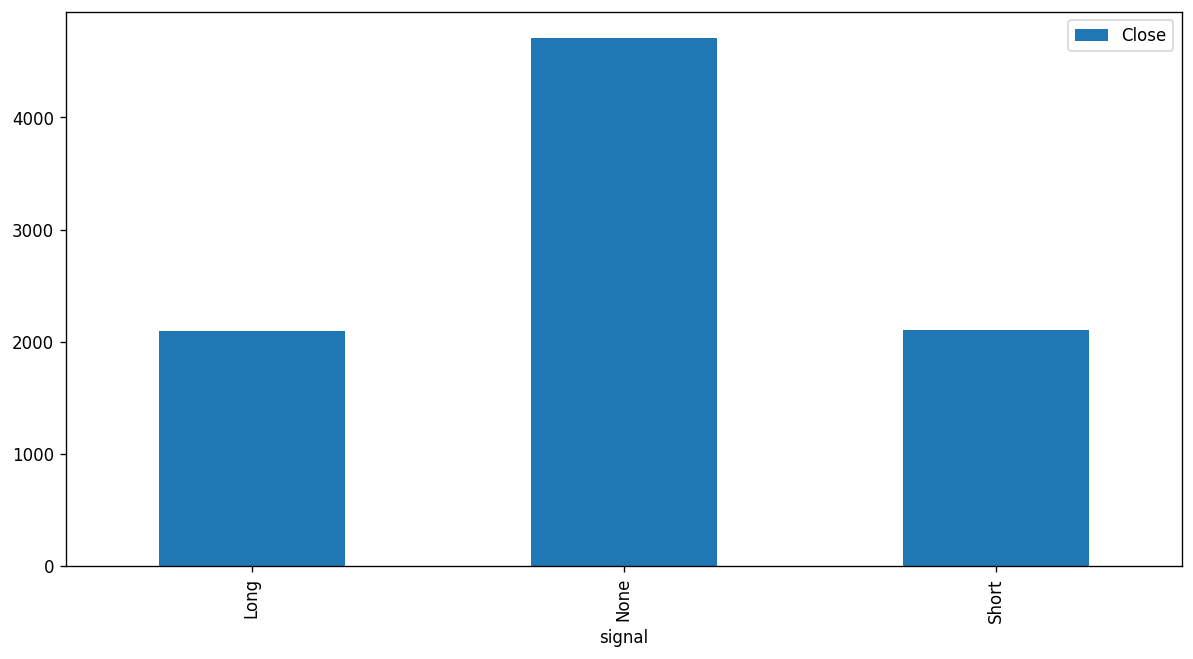

In [8]:
data_grouped_by_signal = data.groupby(['signal'])[['Close']].count()
data_grouped_by_signal.plot.bar()

In [9]:
data

,Open,High,Low,Close,Volume,up,down,signal
Date,,,,,,,,
2018-08-13 09:00:00,943.5,946.4,942.3,946.0,18959,2.9,1.2,None
2018-08-13 10:00:00,945.9,946.3,942.3,943.7,16381,0.4,3.6,None
2018-08-13 11:00:00,943.7,947.3,943.3,947.3,8416,3.6,0.4,None
2018-08-13 13:00:00,947.5,950.2,946.7,949.9,21499,2.7,0.8,None
2018-08-13 14:00:00,949.7,954.6,948.9,954.2,14072,4.9,0.8,Long
...,...,...,...,...,...,...,...,...
2025-10-06 11:00:00,1887.9,1893.0,1886.6,1891.9,15234,5.1,1.3,Long
2025-10-06 13:00:00,1892.2,1898.0,1888.6,1895.2,49154,5.8,3.6,Long
2025-10-06 14:00:00,1895.2,1920.0,1892.8,1918.6,68821,24.8,2.4,Long


<Axes: xlabel='signal,hour'>

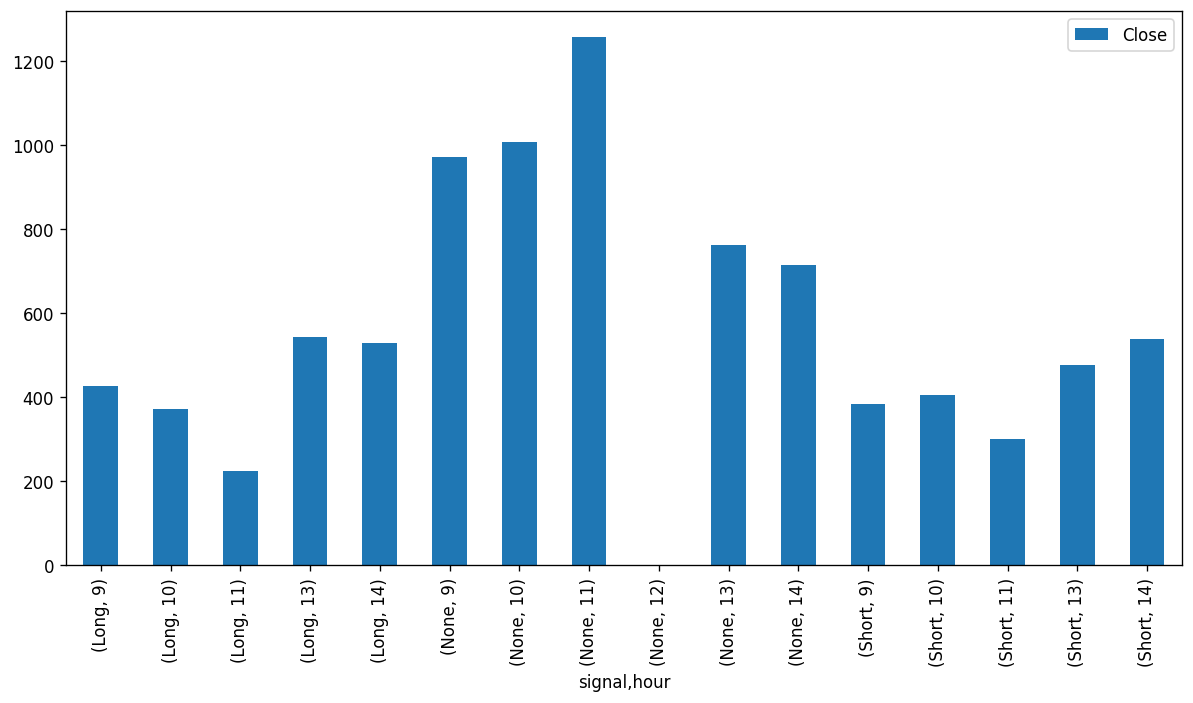

In [10]:
data["hour"] = data.index.hour
data_grouped_by_signal_and_time = data.groupby(['signal', 'hour'])[['Close']].count()
data_grouped_by_signal_and_time.plot.bar()